In [2]:
#importing all the necessary libraries
from keras.datasets import mnist
from keras.initializers import he_normal
from keras.optimizers import Adadelta
from keras.models import Sequential
from keras.layers import Dropout,Dense,BatchNormalization,Conv2D,MaxPool2D,Flatten
from keras.metrics import categorical_accuracy
import matplotlib.pyplot as plt
from keras import backend
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()# loading the train and test data

Few of the Train Images


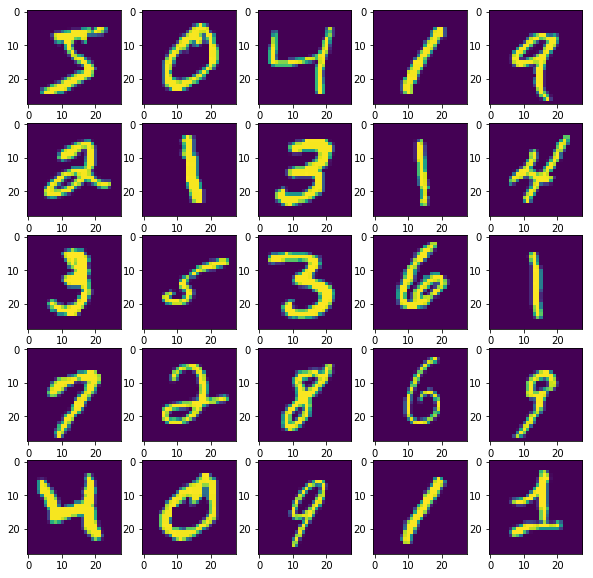

In [4]:
#Plotting few train images
print("Few of the Train Images")
plt.figure(figsize=(10,10))
for x in range(25):
    plt.subplot(5,5,x+1)
    plt.imshow(x_train[x])
plt.show()

In [5]:
#parameter initialization
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
num_classes = 10
batch_size = 200
nepochs = 15

In [6]:
#Checking whether channel is first or last
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#converting the train and test images of type float and then normalizing.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h1> Model 1: 3 CNN layers with dropout and maxpooling <h1>

In [6]:
#Model definition 
model = Sequential()
#Defining 2 CNN followed by maxpool and dropout
model.add(Conv2D(filters=128, kernel_size= (3,3),strides=(1,1),padding= 'same',
                input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(Conv2D(filters=64, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 1 CNN followed by maxpool and dropout
model.add(Conv2D(filters=32, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Output layer
model.add(Flatten())
model.add(Dense(units= 64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))

model.add(Dense(units= num_classes, activation= 'softmax'))


In [8]:
#Model compilation and evaluation
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

model_paras = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nepochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 45s 756us/step - loss: 0.0412 - acc: 0.9879 - val_loss: 0.0165 - val_acc: 0.9939
Epoch 2/15
60000/60000 [==============================] - 45s 748us/step - loss: 0.0422 - acc: 0.9878 - val_loss: 0.0174 - val_acc: 0.9942
Epoch 3/15
60000/60000 [==============================] - 45s 754us/step - loss: 0.0396 - acc: 0.9883 - val_loss: 0.0167 - val_acc: 0.9945
Epoch 4/15
60000/60000 [==============================] - 46s 762us/step - loss: 0.0387 - acc: 0.9885 - val_loss: 0.0190 - val_acc: 0.9939
Epoch 5/15
60000/60000 [==============================] - 45s 755us/step - loss: 0.0384 - acc: 0.9890 - val_loss: 0.0160 - val_acc: 0.9950
Epoch 6/15
60000/60000 [==============================] - 46s 761us/step - loss: 0.0349 - acc: 0.9893 - val_loss: 0.0161 - val_acc: 0.9949
Epoch 7/15
60000/60000 [==============================] - 46s 761us/step - loss: 0.0370 - acc: 0.9896 - val_loss: 0.

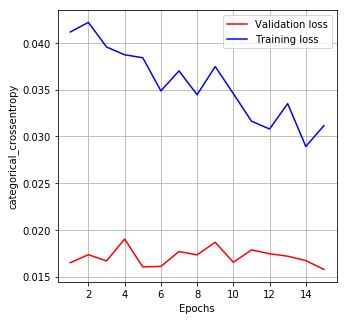

In [21]:
#Plot of validation and train loss
# list of epoch numbers
x = list(range(1,nepochs+1))
plt.figure(figsize=(5,5))
plt.plot(x,model_paras.history['val_loss'],color = 'r',label = 'Validation loss')
plt.plot(x,model_paras.history['loss'],color = 'b',label = 'Training loss')
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.show()

<h1> Model 2: 5 CNN layers with dropout and maxpooling <h1>

In [6]:
#Model definition
model = Sequential()
#2CNN followed by maxpool and dropout
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(1,1),padding= 'same',
                input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#2CNN followed by maxpool and dropout
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#1CNN followed by maxpool and dropout
model.add(Conv2D(filters=128, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.50))

#output layer
model.add(Flatten())
model.add(Dense(units= 64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))

model.add(Dense(units= num_classes, activation= 'softmax'))


In [7]:
#model compilation and evaluation
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

model_paras = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nepochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 125s 2ms/step - loss: 0.6720 - acc: 0.7805 - val_loss: 0.0761 - val_acc: 0.9794
Epoch 2/15
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1464 - acc: 0.9583 - val_loss: 0.0410 - val_acc: 0.9871
Epoch 3/15
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0996 - acc: 0.9724 - val_loss: 0.0329 - val_acc: 0.9888
Epoch 4/15
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0733 - acc: 0.9809 - val_loss: 0.0219 - val_acc: 0.9929
Epoch 5/15
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0639 - acc: 0.9827 - val_loss: 0.0204 - val_acc: 0.9929
Epoch 6/15
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0528 - acc: 0.9860 - val_loss: 0.0190 - val_acc: 0.9939
Epoch 7/15
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0497 - acc: 0.9865 - val_loss: 0.0218 - val_ac

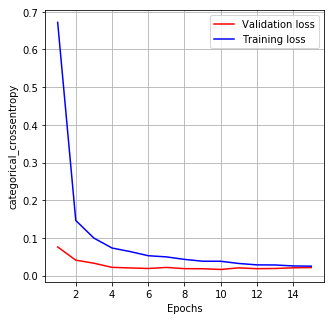

In [8]:
#Plot of validation and train loss
# list of epoch numbers
x = list(range(1,nepochs+1))
plt.figure(figsize=(5,5))
plt.plot(x,model_paras.history['val_loss'],color = 'r',label = 'Validation loss')
plt.plot(x,model_paras.history['loss'],color = 'b',label = 'Training loss')
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.show()

<h1> Model 3: 7 CNN layers with dropout and maxpooling <h1>

In [10]:
#Model definition
model = Sequential()
#2CNN followed by dropout
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(1,1),padding= 'same',
                input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))

model.add(Dropout(0.25))
#2CNN followed by dropout
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(2,2),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(Conv2D(filters=256, kernel_size= (3,3),strides=(2,2),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))

model.add(Dropout(0.25))
#2CNN followed by dropout
model.add(Conv2D(filters=128, kernel_size= (3,3),strides=(2,2),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(Conv2D(filters=128, kernel_size= (3,3),strides=(2,2),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))

model.add(Dropout(0.50))
#1CNN followed by maxpool and dropout
model.add(Conv2D(filters=64, kernel_size= (3,3),strides=(1,1),padding= 'same',
                 input_shape= input_shape,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.50))
#output layer
model.add(Flatten())
model.add(Dense(units= 64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))

model.add(Dense(units= num_classes, activation= 'softmax'))


In [11]:
#model compilation and evaluation
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

model_paras = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nepochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 193s 3ms/step - loss: 0.9688 - acc: 0.6737 - val_loss: 0.0993 - val_acc: 0.9743
Epoch 2/15
60000/60000 [==============================] - 205s 3ms/step - loss: 0.2484 - acc: 0.9353 - val_loss: 0.0779 - val_acc: 0.9811
Epoch 3/15
60000/60000 [==============================] - 199s 3ms/step - loss: 0.1639 - acc: 0.9604 - val_loss: 0.0445 - val_acc: 0.9895
Epoch 4/15
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1292 - acc: 0.9694 - val_loss: 0.0475 - val_acc: 0.9880
Epoch 5/15
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1041 - acc: 0.9759 - val_loss: 0.0516 - val_acc: 0.9882
Epoch 6/15
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0882 - acc: 0.9799 - val_loss: 0.0488 - val_acc: 0.9886
Epoch 7/15
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0817 - acc: 0.9813 - val_loss: 0.0460 - 

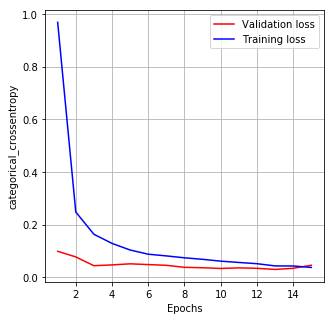

In [12]:
#plot of validation and train loss
# list of epoch numbers
x = list(range(1,nepochs+1))
plt.figure(figsize=(5,5))
plt.plot(x,model_paras.history['val_loss'],color = 'r',label = 'Validation loss')
plt.plot(x,model_paras.history['loss'],color = 'b',label = 'Training loss')
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.show()